**Library**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

<h1>RMS Titanic</h1>
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in
the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden
voyage from Southampton to New York City. There were an estimated 2,224 passengers and
crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial
peacetime maritime disasters in modern history.

Women and children first? The aim is to understand how survivors of Titanic were selected...

*Importation of the data and description of the dataset*

- In this first practical session, we shall work on the dataset titanic.csv on the survival of the passengers of Titanic. Download this dataset as a data frame

In [40]:
Titanic_data = pd.read_csv('titanic.csv')
Titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Describe the dataset titanic : features, nature of the features, number of observations

In [41]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Basic statistics : mean of each variable, quartiles

In [42]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Percentage of missing values for each column. Sort by descending values

In [43]:
missing_value = Titanic_data.isnull().sum() / 891
missing_value.sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

*Basic graphic analysis*

>We want to understand what features could contribute to a high survival rate. It would
make sense if everything except ’PassengerId’, ’Ticket’ and ’Name’ would be correlated with
a high survival rate.

- Get rid off the features ’PassengerId’, ’Ticket’ and ’Name’ which seem irrelevant to
analyse the data

In [44]:
Titanic_passenger_without_id = Titanic_data.drop(['PassengerId', 'Ticket', 'Name'], axis = 1)
Titanic_passenger_without_id

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


- We focus on the features ’Age’ and ’Sex’.

+ Separate the dataset into men and women

In [45]:
Titanic_men_passenger = Titanic_passenger_without_id[Titanic_passenger_without_id['Sex'] == 'male']
Titanic_woman_passenger = Titanic_passenger_without_id[Titanic_passenger_without_id['Sex'] == 'female']

print(Titanic_men_passenger)
print(Titanic_woman_passenger)

     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3  male  22.0      1      0   7.2500   NaN        S
4           0       3  male  35.0      0      0   8.0500   NaN        S
5           0       3  male   NaN      0      0   8.4583   NaN        Q
6           0       1  male  54.0      0      0  51.8625   E46        S
7           0       3  male   2.0      3      1  21.0750   NaN        S
..        ...     ...   ...   ...    ...    ...      ...   ...      ...
883         0       2  male  28.0      0      0  10.5000   NaN        S
884         0       3  male  25.0      0      0   7.0500   NaN        S
886         0       2  male  27.0      0      0  13.0000   NaN        S
889         1       1  male  26.0      0      0  30.0000  C148        C
890         0       3  male  32.0      0      0   7.7500   NaN        Q

[577 rows x 9 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
1           1       1  female  38.0   

+ Display the distribution of the age survivors and non survivors according to the sex. Comment

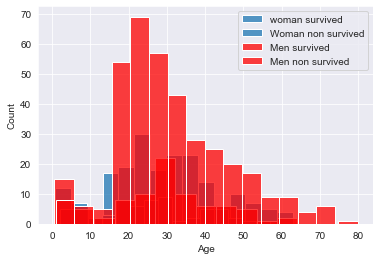

In [46]:
#Furthur classification
Titanic_men_passenger_survived = Titanic_men_passenger[Titanic_men_passenger['Survived'] == 1]
Titanic_men_passenger_no_survived = Titanic_men_passenger[Titanic_men_passenger['Survived'] == 0]
Titanic_woman_passenger_survived = Titanic_woman_passenger[Titanic_woman_passenger['Survived'] == 1]
Titanic_woman_passenger_no_survived = Titanic_woman_passenger[Titanic_woman_passenger['Survived'] == 0]


sns.histplot(Titanic_woman_passenger_survived.Age.dropna(), bins=15, label='woman survived')
sns.histplot(Titanic_woman_passenger_no_survived.Age.dropna(), bins=15, label='Woman non survived')
sns.histplot(Titanic_men_passenger_survived.Age.dropna(), bins=15, label='Men survived',color='red')
sns.histplot(Titanic_men_passenger_no_survived.Age.dropna(), bins=15, label='Men non survived',color='red')

plt.legend()
plt.show()

- At first glance is there some link between ’Embarked’ and ’Survival’.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

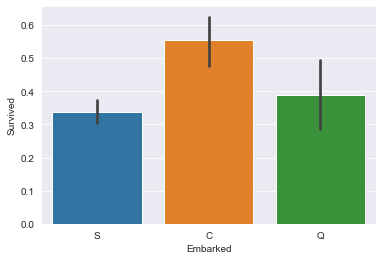

In [47]:
sns.barplot(x='Embarked', y='Survived', data=Titanic_passenger_without_id)

- At first glance is there some link between ’Pclass’ and ’Survival’.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

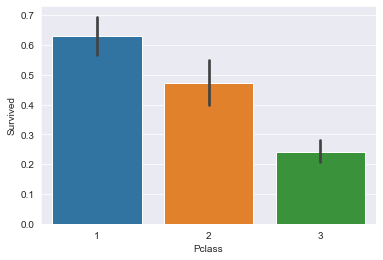

In [48]:
sns.barplot(x='Pclass', y='Survived', data=Titanic_passenger_without_id)

<h1>Middle School</h1>

>Sally is a public school administrator. Some schools in her state of Tennessee are performing below average academically. Her superintendent, under pressure from frustrated parents and voters, approached Sally with the task of understanding why these schools are under-performing. To improve school performance, Sally needs to learn more about these schools and their students, just as a business needs to understand its own strengths and weaknesses and its customers. Sally needs first to engages in a thorough exploratory analysis, which includes data collection, descriptive and inferential statistics, and data visualization. Your job, as a data scientist is to help her

**Importation of the data and description of the dataset**

- Import the TN middle school dataset

In [49]:
middle_tn_schools = pd.read_csv('middle_tn_schools.csv')
middle_tn_schools.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


- Describe the dataset TN middle school : features, nature of the features, number of observation.

In [50]:
middle_tn_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 347 non-null    object 
 1   school_rating        347 non-null    float64
 2   size                 347 non-null    float64
 3   reduced_lunch        347 non-null    float64
 4   state_percentile_16  347 non-null    float64
 5   state_percentile_15  341 non-null    float64
 6   stu_teach_ratio      347 non-null    float64
 7   school_type          347 non-null    object 
 8   avg_score_15         341 non-null    float64
 9   avg_score_16         347 non-null    float64
 10  full_time_teachers   347 non-null    float64
 11  percent_black        347 non-null    float64
 12  percent_white        347 non-null    float64
 13  percent_asian        347 non-null    float64
 14  percent_hispanic     347 non-null    float64
dtypes: float64(13), object(2)
memory usage: 

- Basic statistics : mean of each variable, quartiles

In [51]:
middle_tn_schools.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


- Calculate the correlation matrix between the features and visualize it with the function heatmap of the library seaborn

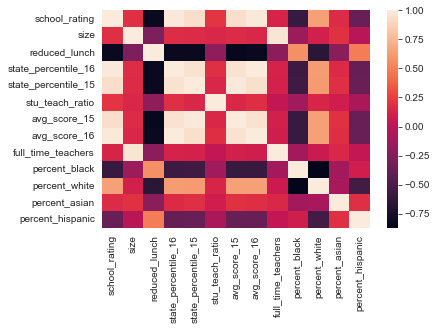

In [52]:
sns.heatmap(middle_tn_schools.corr())
plt.show()

*Correlation analysis between the two variables reduced lunch and school rating*

>We now focus on the two variables reduced lunch and school rating

- Isolate the variable reduced lunch and groups the data by school rating using pandas groupby. Thereafter describe the re-shaped data

In [53]:
relation = middle_tn_schools[['reduced_lunch','school_rating']].groupby('school_rating')
relation.describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

Remark: Rich people go to best school.

- What is the correlation between these two variables?

In [54]:
corr = middle_tn_schools[['reduced_lunch','school_rating']].corr()
corr

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


- Graph a box-and-whisker plot for the variable reduced lunch grouped by school rating

<AxesSubplot:title={'center':'reduced_lunch'}, xlabel='[school_rating]'>

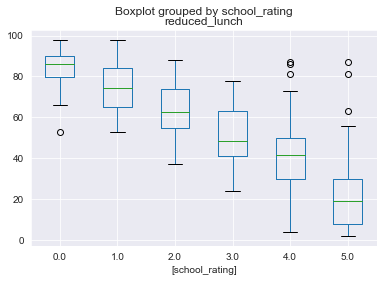

In [55]:
middle_tn_schools[['reduced_lunch','school_rating']].boxplot(by='school_rating')

- To further examine the relationship between school rating and reduced lunch, graph the two variables on a scatter plot. Comment!

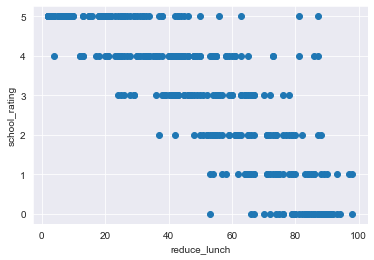

In [56]:
plt.scatter(middle_tn_schools['reduced_lunch'],middle_tn_schools['school_rating'])
plt.xlabel('reduce_lunch')
plt.ylabel('school_rating')
plt.show()